In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [9]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

data_df = pd.read_csv("german_credit.csv")

data_df.shape


(1000, 21)

In [10]:
data_df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [11]:
from sklearn.model_selection import train_test_split

X =  data_df.drop("default", axis=1)
y =  data_df.pop("default")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)

In [12]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [18]:
# Print Shape of model data
X_train = pd.get_dummies(X_train)

X_train.shape

(500, 61)

### Check for highly correlated variables but don't required any treatment for this use case

In [30]:
X_train.corr()[(X_train.corr().abs() < 0.5) == False ]

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
duration_in_month,1.000000,0.621934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credit_amount,0.621934,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment_as_income_perc,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
present_res_since,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credits_this_bank,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
people_under_maintenance,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_check_status_0 <= ... < 200 DM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_check_status_< 0 DM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_check_status_>= 200 DM / salary assignments for at least 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#From the above correlation matrix the features with absolute correlation > 0.5 can be seen.

### Drop the original variables which are converted to dummy

In [36]:
data_df = pd.read_csv("german_credit.csv")
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [41]:
drop_list = []
for feature in data_df.columns: # Loop through all columns in the dataframe
    if data_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        drop_list.append(feature)

In [43]:
drop_list

['account_check_status',
 'credit_history',
 'purpose',
 'savings',
 'present_emp_since',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'job',
 'telephone',
 'foreign_worker']

In [46]:
data_df = data_df.drop(drop_list,axis=1)

In [47]:
data_df.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
0,0,6,1169,4,4,67,2,1
1,1,48,5951,2,2,22,1,1
2,0,12,2096,2,3,49,1,2
3,0,42,7882,2,4,45,1,2
4,1,24,4870,3,4,53,2,2


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [48]:
from sklearn.model_selection import train_test_split

X =  data_df.drop("default", axis=1)
y =  data_df.pop("default")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
Rf_model = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion='entropy',random_state=9999 )
Rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [134]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,auc

In [90]:
y_pred = Rf_model.predict(X_test)

In [91]:
cm = confusion_matrix(y_test, y_pred)
Rf_acc=accuracy_score(y_test,y_pred)

In [92]:
#Confusion Matrix
cm

array([[188,  26],
       [ 58,  28]], dtype=int64)

In [93]:
#Accuracy Score
Rf_acc

0.72

### Q6 Show the list of the features importance( 1 Marks)

In [94]:
print (pd.Series(Rf_model.feature_importances_,index = list(X)).sort_values(ascending=False))

credit_amount                 0.333290
age                           0.250596
duration_in_month             0.191778
present_res_since             0.083672
installment_as_income_perc    0.067890
credits_this_bank             0.047919
people_under_maintenance      0.024855
dtype: float64


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [95]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict

In [96]:
# Use below values
num_folds = 10
seed = 77

In [97]:
#Validate the Random Forest model build above using k fold

In [98]:
kf = KFold(n_splits=10,random_state=77)
print(kf)

KFold(n_splits=10, random_state=77, shuffle=False)


In [99]:
cv_scores = cross_val_score(Rf_model, X_train, y_train, cv=10, scoring='accuracy')
cv_scores

array([0.67605634, 0.69014085, 0.61971831, 0.71830986, 0.65714286,
       0.65714286, 0.63768116, 0.62318841, 0.73913043, 0.66666667])

In [100]:
#Calculate Mean score

In [101]:
print("Mean score:" , np.average(cv_scores))

Mean score: 0.6685177733065057


In [102]:
# Calculate score standard deviation using std()

In [103]:
print("Standard Deviation of the scores:" , np.std(cv_scores))

Standard Deviation of the scores: 0.03693105325226642


# Q8 Print the confusion matrix( 1 Marks)

In [104]:
y_predict = cross_val_predict(Rf_model, X_test, y_test)

In [105]:
cm2 = confusion_matrix(y_test, y_predict)
Rf_acc2=accuracy_score(y_test,y_predict)

In [106]:
# Confusion Matrix
cm2

array([[194,  20],
       [ 69,  17]], dtype=int64)

In [107]:
Rf_acc2

0.7033333333333334

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [110]:
cr=classification_report(y_test , y_pred)
print(cr)
# Precision and Recall are given below

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       214
           1       0.52      0.33      0.40        86

   micro avg       0.72      0.72      0.72       300
   macro avg       0.64      0.60      0.61       300
weighted avg       0.69      0.72      0.70       300



In [111]:
#Classification Accuracy
Rf_acc=accuracy_score(y_test,y_pred)
Rf_acc

0.72

# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [127]:
#Hint: Use roc_curve

In [130]:
preds = Rf_model.predict_proba(X_test)[:,1]

In [135]:
fpr, tpr, threshold = roc_curve(y_test,preds)

In [137]:
roc_auc = auc(fpr, tpr)

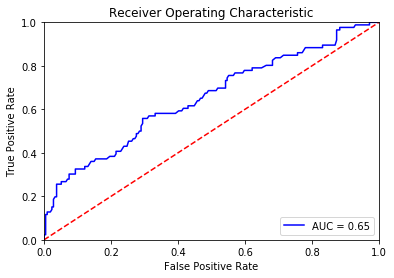

In [139]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [ ]:
roc_auc = auc(fpr, tpr)

In [140]:
print("AUC:" , roc_auc)

AUC: 0.65309171919148


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [141]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [144]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    Rf_model.fit(X_, y_)
    y_pred = Rf_model.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [145]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7070000000000001
Standard deviation:  0.014940623220676639
